# AVI-DYS (Different Video Folders)

https://deeplabcut.github.io/DeepLabCut/docs/standardDeepLabCut_UserGuide.html

## Set Up

### Import Libraries

In [1]:
import deeplabcut
import napari
import os
import yaml

Loading DLC 2.3.0...


### Specify Notebook Parameters

If you are using this notebook for the first time, pass the gpu you want to use and the directory containing the video files

In [2]:
notebook_gpu = 1
videoDir = "C:\\Users\\zacha\\Data\\AVI-DYS\\DATA\\cropped"

If you've already created a project, paste the config path below

In [ ]:
config_path = "C:\\Users\\zacha\\Repos\\AVI-DYS\\AVI-DYS-lower-limb-zach_roth-2023-04-19\\config.yaml"
# Windows users
project_path=config_path.rsplit('\\',1)[0]
# Mac or Linux users
# project_path=config_path.rsplit('/',1)[0]

### Create a helper function to return the paths of videos in a directory

In [8]:
def getVideos(videoDir):
    videos = os.listdir(videoDir)
    videos.sort()
    videos_path = []
    for video in videos:
        videos_path.append(os.path.join(videoDir, video))
    return videos_path

In [9]:
# Get a list of videos
videos_path = getVideos(videoDir)

## (A) Create a New Project

In [ ]:
deeplabcut.create_project.new.create_new_project?

In [11]:
config_path=deeplabcut.create_project.new.create_new_project(
            project = 'AVI-DYS-lower-limb',
            experimenter = 'zach_roth',
            videos = videos_path,
            working_directory=os.getcwd(),
            copy_videos=True,
            videotype='.mp4',
            multianimal=False,
            )

Created "C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos"
Created "C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\labeled-data"
Created "C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\training-datasets"
Created "C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\dlc-models"
Copying the videos
C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\001-11cropped.mp4
C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\001-12cropped.mp4
C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\003-11cropped.mp4
C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\003-12cropped.mp4
C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\004-11cropped.mp4
C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\004-12cropped.mp4
C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach

### (B) Configure the Project

#### Create a helper function to modify .yaml config files

In [12]:
 def modify_yaml(filename,write_file, key,value):
    with open(f'{filename}', 'r') as f:
        data = yaml.safe_load(f)
        data[f'{key}'] = value
    with open(f'{write_file}', 'w') as file:
        yaml.dump(data,file,sort_keys=False)
    print(f"{key} modified!")

In [13]:
# Create a list of bodyparts
bodyparts = ['RKNE',
             'RANK',
             'RD3M',
             'RD1M',
             'RHLX',
             'LHLX',
             'LD1M',
             'LD3M',
             'LANK',
             'LKNE']

In [14]:
modify_yaml(config_path, config_path, 'bodyparts', bodyparts)

bodyparts modified!


In [15]:
modify_yaml(config_path, config_path, 'numframes2pick', 10)

numframes2pick modified!


In [16]:
skeleton  = [['RKNE','RANK'],
             ['RANK','RD3M'],
             ['RANK','RD1M'],
             ['RD1M','RHLX'],
             ['LKNE','LANK'],
             ['LANK','LD3M'],
             ['LANK','LD1M'],
             ['LD1M','LHLX']]

In [17]:
modify_yaml(config_path, config_path, 'skeleton', skeleton)

skeleton modified!


In [18]:
modify_yaml(config_path, config_path, 'pcutoff', 0.8)

pcutoff modified!


In [19]:
modify_yaml(config_path, config_path, 'dotsize', 10)

dotsize modified!


In [20]:
modify_yaml(config_path, config_path, 'default_net_type', 'resnet_152')

default_net_type modified!


In [21]:
modify_yaml(config_path, config_path, 'default_augmenter', 'imgaug')

default_augmenter modified!


In [22]:
modify_yaml(config_path, config_path, 'skeleton_color', 'white')

skeleton_color modified!


## Crop the videos using the GUI

In [ ]:
## In the command prompt type:
# conda activate DEEPLABCUT (or the name of your DLC env)
# python -m deeplabcut

## (C) Data Selection (extract frames)

In [ ]:
deeplabcut.extract_frames?

In [24]:
deeplabcut.extract_frames(
    config_path,
    mode='automatic',
    algo='kmeans',
    crop=False,
    userfeedback=False,
    cluster_step=1,
    cluster_resizewidth=30,
    cluster_color=False,
    opencv=True,
    slider_width=25,
    config3d=None,
    extracted_cam=0,
    videos_list=None,
)

Config file read successfully.
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 8.24  seconds.
Extracting and downsampling... 206  frames from the video.


206it [00:00, 1572.52it/s]

Kmeans clustering ... (this might take a while)



C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 16.08  seconds.
Extracting and downsampling... 402  frames from the video.


402it [00:00, 1062.18it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 5.4  seconds.
Extracting and downsampling... 135  frames from the video.


135it [00:00, 1261.64it/s]

Kmeans clustering ... (this might take a while)



C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 12.48  seconds.
Extracting and downsampling... 312  frames from the video.


312it [00:00, 1411.76it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 11.36  seconds.
Extracting and downsampling... 284  frames from the video.


284it [00:00, 818.45it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 11.12  seconds.
Extracting and downsampling... 278  frames from the video.


278it [00:00, 815.25it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 13.0  seconds.
Extracting and downsampling... 325  frames from the video.


325it [00:00, 1351.15it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 8.12  seconds.
Extracting and downsampling... 203  frames from the video.


203it [00:00, 1429.58it/s]

Kmeans clustering ... (this might take a while)



C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 19.44  seconds.
Extracting and downsampling... 486  frames from the video.


486it [00:00, 2466.98it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 15.72  seconds.
Extracting and downsampling... 393  frames from the video.


393it [00:00, 2298.25it/s]

Kmeans clustering ... (this might take a while)



C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 19.0  seconds.
Extracting and downsampling... 475  frames from the video.


475it [00:00, 1503.16it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 26.73  seconds.
Extracting and downsampling... 802  frames from the video.


802it [00:00, 1053.69it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 55.44  seconds.
Extracting and downsampling... 1386  frames from the video.


1386it [00:14, 93.48it/s] 
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 50.28  seconds.
Extracting and downsampling... 1257  frames from the video.


1257it [00:01, 1116.57it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 10.6  seconds.
Extracting and downsampling... 265  frames from the video.


265it [00:00, 1840.30it/s]

Kmeans clustering ... (this might take a while)



C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 14.4  seconds.
Extracting and downsampling... 360  frames from the video.


360it [00:03, 91.99it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 24.24  seconds.
Extracting and downsampling... 606  frames from the video.


606it [00:00, 1986.88it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 31.28  seconds.
Extracting and downsampling... 782  frames from the video.


782it [00:00, 1822.86it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 29.2  seconds.
Extracting and downsampling... 730  frames from the video.


730it [00:00, 2232.41it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 26.8  seconds.
Extracting and downsampling... 670  frames from the video.


670it [00:00, 2067.90it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 26.68  seconds.
Extracting and downsampling... 667  frames from the video.


667it [00:00, 2363.35it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 29.72  seconds.
Extracting and downsampling... 743  frames from the video.


743it [00:00, 2279.27it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 31.28  seconds.
Extracting and downsampling... 782  frames from the video.


782it [00:00, 1974.77it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 28.4  seconds.
Extracting and downsampling... 710  frames from the video.


710it [00:00, 1698.57it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 33.08  seconds.
Extracting and downsampling... 827  frames from the video.


827it [00:00, 2576.33it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 34.04  seconds.
Extracting and downsampling... 851  frames from the video.


851it [00:00, 2438.40it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 22.32  seconds.
Extracting and downsampling... 558  frames from the video.


558it [00:00, 2906.23it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 26.0  seconds.
Extracting and downsampling... 650  frames from the video.


650it [00:00, 3095.26it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 19.28  seconds.
Extracting and downsampling... 482  frames from the video.


482it [00:00, 2605.40it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 17.88  seconds.
Extracting and downsampling... 447  frames from the video.


447it [00:00, 2403.22it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 17.92  seconds.
Extracting and downsampling... 448  frames from the video.


448it [00:00, 1799.19it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 17.24  seconds.
Extracting and downsampling... 431  frames from the video.


431it [00:00, 1823.53it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 18.16  seconds.
Extracting and downsampling... 454  frames from the video.


454it [00:00, 2751.52it/s]

Kmeans clustering ... (this might take a while)



C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 16.04  seconds.
Extracting and downsampling... 401  frames from the video.


401it [00:00, 2655.64it/s]

Kmeans clustering ... (this might take a while)



C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 15.52  seconds.
Extracting and downsampling... 388  frames from the video.


388it [00:00, 2242.78it/s]

Kmeans clustering ... (this might take a while)



C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 17.04  seconds.
Extracting and downsampling... 426  frames from the video.


426it [00:00, 2130.00it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 11.4  seconds.
Extracting and downsampling... 285  frames from the video.


285it [00:00, 2126.87it/s]

Kmeans clustering ... (this might take a while)



C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 16.32  seconds.
Extracting and downsampling... 408  frames from the video.


408it [00:00, 1718.24it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 15.0  seconds.
Extracting and downsampling... 375  frames from the video.


375it [00:00, 1470.59it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 27.72  seconds.
Extracting and downsampling... 693  frames from the video.


693it [00:00, 1550.22it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 23.28  seconds.
Extracting and downsampling... 582  frames from the video.


582it [00:00, 1966.22it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 22.32  seconds.
Extracting and downsampling... 558  frames from the video.


558it [00:00, 1754.72it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 29.28  seconds.
Extracting and downsampling... 732  frames from the video.


732it [00:00, 2400.01it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 16.64  seconds.
Extracting and downsampling... 416  frames from the video.


416it [00:00, 1740.58it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 40.6  seconds.
Extracting and downsampling... 1015  frames from the video.


1015it [00:00, 1996.72it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 36.76  seconds.
Extracting and downsampling... 919  frames from the video.


919it [00:00, 1904.46it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 24.92  seconds.
Extracting and downsampling... 623  frames from the video.


623it [00:00, 2170.74it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 21.28  seconds.
Extracting and downsampling... 532  frames from the video.


532it [00:00, 2180.32it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 25.44  seconds.
Extracting and downsampling... 636  frames from the video.


636it [00:00, 1338.95it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 28.52  seconds.
Extracting and downsampling... 713  frames from the video.


713it [00:00, 1658.14it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 39.76  seconds.
Extracting and downsampling... 994  frames from the video.


994it [00:02, 349.87it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 42.8  seconds.
Extracting and downsampling... 1070  frames from the video.


1070it [00:02, 361.00it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 40.56  seconds.
Extracting and downsampling... 1014  frames from the video.


1014it [00:03, 306.48it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 43.36  seconds.
Extracting and downsampling... 1084  frames from the video.


1084it [00:03, 314.37it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 18.24  seconds.
Extracting and downsampling... 456  frames from the video.


456it [00:01, 369.23it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 21.32  seconds.
Extracting and downsampling... 533  frames from the video.


533it [00:03, 146.63it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 28.16  seconds.
Extracting and downsampling... 704  frames from the video.


704it [00:02, 295.77it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 11.12  seconds.
Extracting and downsampling... 278  frames from the video.


278it [00:03, 86.28it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 10.88  seconds.
Extracting and downsampling... 272  frames from the video.


272it [00:00, 978.43it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 27.64  seconds.
Extracting and downsampling... 691  frames from the video.


691it [00:00, 1295.51it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 24.96  seconds.
Extracting and downsampling... 624  frames from the video.


624it [00:01, 363.17it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 54.24  seconds.
Extracting and downsampling... 1356  frames from the video.


1356it [00:04, 279.27it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 27.44  seconds.
Extracting and downsampling... 686  frames from the video.


686it [00:00, 1469.61it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 36.44  seconds.
Extracting and downsampling... 911  frames from the video.


911it [00:00, 1479.37it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 31.2  seconds.
Extracting and downsampling... 780  frames from the video.


780it [00:00, 934.57it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 36.0  seconds.
Extracting and downsampling... 900  frames from the video.


900it [00:00, 936.85it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 13.92  seconds.
Extracting and downsampling... 348  frames from the video.


348it [00:00, 478.91it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 10.56  seconds.
Extracting and downsampling... 264  frames from the video.


264it [00:00, 494.38it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 19.68  seconds.
Extracting and downsampling... 492  frames from the video.


492it [00:00, 1769.79it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 19.16  seconds.
Extracting and downsampling... 479  frames from the video.


479it [00:00, 1602.01it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 17.76  seconds.
Extracting and downsampling... 444  frames from the video.


444it [00:00, 1193.55it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 17.28  seconds.
Extracting and downsampling... 432  frames from the video.


432it [00:00, 1272.23it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 21.12  seconds.
Extracting and downsampling... 528  frames from the video.


528it [00:00, 1232.21it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Extracting frames based on kmeans ...
Kmeans-quantization based extracting of frames from 0.0  seconds to 15.04  seconds.
Extracting and downsampling... 376  frames from the video.


376it [00:00, 1373.69it/s]
C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kmeans clustering ... (this might take a while)
Frames were successfully extracted, for the videos listed in the config.yaml file.

You can now label the frames using the function 'label_frames' (Note, you should label frames extracted from diverse videos (and many videos; we do not recommend training on single videos!)).


## (D) Label Frames

#### Option 1: access the napari labelling GUI via the notebook

In [43]:
napari.Viewer()

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 0.0, 0.0), zoom=1.0, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0, 2, 1), (0, 2, 1)), current_step=(0, 0), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[], scale_bar=ScaleBar(visible=False, colored=False, color=array([1., 0., 1., 1.], dtype=float32), ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, box=False, box_color=array([0. , 0. , 0. , 0.6], dtype=float32), unit=None), text_overlay=TextOverlay(visible=False, color=array([0.5, 0.5, 0.5, 1. ], dtype=float32), font_size=10.0, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handl

#### Option 2: access the napari labelling GUI via the Deeplabcut GUI

In [ ]:
# in the python command console type:

# conda activate DEEPLABCUT
# python -m deeplabcut

## (E) Check Annotated Frames

In [ ]:
deeplabcut.check_labels?

In [3]:
deeplabcut.check_labels(
    config_path,
    Labels='+',
    scale=1,
    dpi=300,
    draw_skeleton=True,
    visualizeindividuals=False,
)

Creating images with labels by zach_roth.


100%|██████████| 10/10 [00:00<00:00, 13.73it/s]

If all the labels are ok, then use the function 'create_training_dataset' to create the training dataset!


## (F) Create Training Dataset(s)

In [ ]:
deeplabcut.create_training_dataset?

In [4]:
deeplabcut.create_training_dataset(
    config_path,
    num_shuffles=3,
    Shuffles=None,
    windows2linux=False,
    userfeedback=False,
    trainIndices=None,
    testIndices=None,
    net_type='resnet_152',
    augmenter_type='imgaug',
    posecfg_template=None,
)

The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!
The training dataset is successfully created. Use the function 'train_network' to start training. Happy training!


[(0.95,
  1,
  (array([196, 187,  14,  31, 682, 680, 301, 710, 467,  27,  40, 363,  55,
          157, 193, 170, 624, 392, 671,  79, 263, 635, 258, 162, 390, 313,
          202, 243, 637, 443,   8, 700, 653, 175, 403, 502, 704, 558,  75,
          334, 283,   1, 272, 494, 598, 638, 369, 365, 601,  85, 516, 575,
          491, 532, 566, 332, 428, 662, 436, 408, 299, 350, 719, 351, 451,
          250, 514, 407, 362, 271, 501, 563, 665, 656, 103, 711, 498, 596,
          344, 267, 211, 681, 181,  50, 268, 534, 364, 493, 302, 142,  10,
           68, 331, 214, 505, 733, 303, 585, 215, 231, 386, 614, 739, 385,
          495, 557, 669, 316, 592, 356, 113, 395, 252,  49, 632, 156, 481,
          122, 434, 462,  37, 172,  48, 437, 294, 648,  18, 524, 419,  76,
           64, 588,  52, 651, 546, 654, 210, 476, 521, 499, 489, 118, 222,
          695, 519, 520, 240,  97, 509, 391, 504, 247, 576, 251,  17, 616,
          511, 333, 327, 578, 679, 573, 666, 591,  45, 306,  62, 360, 608,
          26

## (G) Train The Network

In [72]:
pose_cfg_path = "C:\\Users\\zacha\\Repos\\AVI-DYS\\AVI-DYS-lower-limb-zach_roth-2023-04-07\\dlc-models\iteration-0\\AVI-DYS-lower-limbApr7-trainset95shuffle1\\train\\pose_cfg.yaml"

In [ ]:
deeplabcut.train_network?

In [5]:
deeplabcut.train_network(
    config_path,
    shuffle=1,
    trainingsetindex=0,
    max_snapshots_to_keep=5,
    displayiters=1000,
    saveiters=10000,
    maxiters=1000000,
    allow_growth=True,
    gputouse=notebook_gpu,
    autotune=False,
    keepdeconvweights=True,
    modelprefix='',
)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]],
 'all_joints_names': ['RKNE',
                      'RANK',
                      'RD3M',
                      'RD1M',
                      'RHLX',
                      'LHLX',
                      'LD1M',
                      'LD3M',
                      'LANK',
                      'LKNE'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_AVI-DYS-lower-limbApr19\\AVI-DYS-lower-limb_zach_roth95shuffle1.mat',
 'dataset_type': 'imgaug',
 'decay_steps': 30000,
 'det

Selecting single-animal trainer
Batch Size is 1


C:\Users\zacha\anaconda3\envs\dlc-gpu1\lib\site-packages\tensorflow\python\keras\engine\base_layer_v1.py:1694: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '


Loading ImageNet-pretrained resnet_152
Max_iters overwritten as 1000000
Display_iters overwritten as 1000
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\Users\\zacha\\Repos\\AVI-DYS\\AVI-DYS-lower-limb-zach_roth-2023-04-19\\dlc-models\\iteration-0\\AVI-DYS-lower-limbApr19-trainset95shuffle1\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present_joints': False, 'partaffinityfield_predict': Fa

iteration: 1000 loss: 0.0387 lr: 0.005
iteration: 2000 loss: 0.0264 lr: 0.005
iteration: 3000 loss: 0.0224 lr: 0.005
iteration: 4000 loss: 0.0201 lr: 0.005
iteration: 5000 loss: 0.0184 lr: 0.005
iteration: 6000 loss: 0.0174 lr: 0.005
iteration: 7000 loss: 0.0159 lr: 0.005
iteration: 8000 loss: 0.0152 lr: 0.005
iteration: 9000 loss: 0.0146 lr: 0.005
iteration: 10000 loss: 0.0146 lr: 0.005
iteration: 11000 loss: 0.0177 lr: 0.02
iteration: 12000 loss: 0.0158 lr: 0.02
iteration: 13000 loss: 0.0149 lr: 0.02
iteration: 14000 loss: 0.0135 lr: 0.02
iteration: 15000 loss: 0.0130 lr: 0.02
iteration: 16000 loss: 0.0124 lr: 0.02
iteration: 17000 loss: 0.0123 lr: 0.02
iteration: 18000 loss: 0.0115 lr: 0.02
iteration: 19000 loss: 0.0112 lr: 0.02
iteration: 20000 loss: 0.0106 lr: 0.02
iteration: 21000 loss: 0.0109 lr: 0.02
iteration: 22000 loss: 0.0103 lr: 0.02
iteration: 23000 loss: 0.0103 lr: 0.02
iteration: 24000 loss: 0.0103 lr: 0.02
iteration: 25000 loss: 0.0102 lr: 0.02
iteration: 26000 loss: 0

iteration: 209000 loss: 0.0047 lr: 0.02
iteration: 210000 loss: 0.0050 lr: 0.02
iteration: 211000 loss: 0.0047 lr: 0.02
iteration: 212000 loss: 0.0049 lr: 0.02
iteration: 213000 loss: 0.0049 lr: 0.02
iteration: 214000 loss: 0.0050 lr: 0.02
iteration: 215000 loss: 0.0047 lr: 0.02
iteration: 216000 loss: 0.0047 lr: 0.02
iteration: 217000 loss: 0.0046 lr: 0.02
iteration: 218000 loss: 0.0050 lr: 0.02
iteration: 219000 loss: 0.0049 lr: 0.02
iteration: 220000 loss: 0.0047 lr: 0.02
iteration: 221000 loss: 0.0046 lr: 0.02
iteration: 222000 loss: 0.0051 lr: 0.02
iteration: 223000 loss: 0.0048 lr: 0.02
iteration: 224000 loss: 0.0047 lr: 0.02
iteration: 225000 loss: 0.0049 lr: 0.02
iteration: 226000 loss: 0.0048 lr: 0.02
iteration: 227000 loss: 0.0046 lr: 0.02
iteration: 228000 loss: 0.0049 lr: 0.02
iteration: 229000 loss: 0.0048 lr: 0.02
iteration: 230000 loss: 0.0046 lr: 0.02
iteration: 231000 loss: 0.0046 lr: 0.02
iteration: 232000 loss: 0.0045 lr: 0.02
iteration: 233000 loss: 0.0047 lr: 0.02


iteration: 414000 loss: 0.0041 lr: 0.02
iteration: 415000 loss: 0.0041 lr: 0.02
iteration: 416000 loss: 0.0040 lr: 0.02
iteration: 417000 loss: 0.0037 lr: 0.02
iteration: 418000 loss: 0.0039 lr: 0.02
iteration: 419000 loss: 0.0038 lr: 0.02
iteration: 420000 loss: 0.0039 lr: 0.02
iteration: 421000 loss: 0.0039 lr: 0.02
iteration: 422000 loss: 0.0038 lr: 0.02
iteration: 423000 loss: 0.0039 lr: 0.02
iteration: 424000 loss: 0.0038 lr: 0.02
iteration: 425000 loss: 0.0038 lr: 0.02
iteration: 426000 loss: 0.0039 lr: 0.02
iteration: 427000 loss: 0.0039 lr: 0.02
iteration: 428000 loss: 0.0039 lr: 0.02
iteration: 429000 loss: 0.0037 lr: 0.02
iteration: 430000 loss: 0.0040 lr: 0.02
iteration: 431000 loss: 0.0036 lr: 0.002
iteration: 432000 loss: 0.0035 lr: 0.002
iteration: 433000 loss: 0.0035 lr: 0.002
iteration: 434000 loss: 0.0035 lr: 0.002
iteration: 435000 loss: 0.0034 lr: 0.002
iteration: 436000 loss: 0.0035 lr: 0.002
iteration: 437000 loss: 0.0034 lr: 0.002
iteration: 438000 loss: 0.0034 lr

iteration: 615000 loss: 0.0029 lr: 0.002
iteration: 616000 loss: 0.0029 lr: 0.002
iteration: 617000 loss: 0.0030 lr: 0.002
iteration: 618000 loss: 0.0030 lr: 0.002
iteration: 619000 loss: 0.0029 lr: 0.002
iteration: 620000 loss: 0.0030 lr: 0.002
iteration: 621000 loss: 0.0029 lr: 0.002
iteration: 622000 loss: 0.0031 lr: 0.002
iteration: 623000 loss: 0.0029 lr: 0.002
iteration: 624000 loss: 0.0031 lr: 0.002
iteration: 625000 loss: 0.0030 lr: 0.002
iteration: 626000 loss: 0.0030 lr: 0.002
iteration: 627000 loss: 0.0031 lr: 0.002
iteration: 628000 loss: 0.0030 lr: 0.002
iteration: 629000 loss: 0.0031 lr: 0.002
iteration: 630000 loss: 0.0029 lr: 0.002
iteration: 631000 loss: 0.0030 lr: 0.002
iteration: 632000 loss: 0.0030 lr: 0.002
iteration: 633000 loss: 0.0031 lr: 0.002
iteration: 634000 loss: 0.0029 lr: 0.002
iteration: 635000 loss: 0.0031 lr: 0.002
iteration: 636000 loss: 0.0031 lr: 0.002
iteration: 637000 loss: 0.0029 lr: 0.002
iteration: 638000 loss: 0.0029 lr: 0.002
iteration: 63900

iteration: 815000 loss: 0.0028 lr: 0.001
iteration: 816000 loss: 0.0029 lr: 0.001
iteration: 817000 loss: 0.0029 lr: 0.001
iteration: 818000 loss: 0.0029 lr: 0.001
iteration: 819000 loss: 0.0030 lr: 0.001
iteration: 820000 loss: 0.0029 lr: 0.001
iteration: 821000 loss: 0.0027 lr: 0.001
iteration: 822000 loss: 0.0027 lr: 0.001
iteration: 823000 loss: 0.0028 lr: 0.001
iteration: 824000 loss: 0.0029 lr: 0.001
iteration: 825000 loss: 0.0028 lr: 0.001
iteration: 826000 loss: 0.0028 lr: 0.001
iteration: 827000 loss: 0.0028 lr: 0.001
iteration: 828000 loss: 0.0028 lr: 0.001
iteration: 829000 loss: 0.0028 lr: 0.001
iteration: 830000 loss: 0.0029 lr: 0.001
iteration: 831000 loss: 0.0029 lr: 0.001
iteration: 832000 loss: 0.0027 lr: 0.001
iteration: 833000 loss: 0.0029 lr: 0.001
iteration: 834000 loss: 0.0028 lr: 0.001
iteration: 835000 loss: 0.0028 lr: 0.001
iteration: 836000 loss: 0.0028 lr: 0.001
iteration: 837000 loss: 0.0029 lr: 0.001
iteration: 838000 loss: 0.0027 lr: 0.001
iteration: 83900

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


In [6]:
deeplabcut.train_network(
    config_path,
    shuffle=2,
    trainingsetindex=0,
    max_snapshots_to_keep=5,
    displayiters=1000,
    saveiters=10000,
    maxiters=1000000,
    allow_growth=True,
    gputouse=notebook_gpu,
    autotune=False,
    keepdeconvweights=True,
    modelprefix='',
)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]],
 'all_joints_names': ['RKNE',
                      'RANK',
                      'RD3M',
                      'RD1M',
                      'RHLX',
                      'LHLX',
                      'LD1M',
                      'LD3M',
                      'LANK',
                      'LKNE'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_AVI-DYS-lower-limbApr19\\AVI-DYS-lower-limb_zach_roth95shuffle2.mat',
 'dataset_type': 'imgaug',
 'decay_steps': 30000,
 'det

Selecting single-animal trainer
Batch Size is 1
Loading ImageNet-pretrained resnet_152
Max_iters overwritten as 1000000
Display_iters overwritten as 1000
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\Users\\zacha\\Repos\\AVI-DYS\\AVI-DYS-lower-limb-zach_roth-2023-04-19\\dlc-models\\iteration-0\\AVI-DYS-lower-limbApr19-trainset95shuffle2\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present

iteration: 1000 loss: 0.0391 lr: 0.005
iteration: 2000 loss: 0.0265 lr: 0.005
iteration: 3000 loss: 0.0232 lr: 0.005
iteration: 4000 loss: 0.0207 lr: 0.005
iteration: 5000 loss: 0.0186 lr: 0.005
iteration: 6000 loss: 0.0165 lr: 0.005
iteration: 7000 loss: 0.0159 lr: 0.005
iteration: 8000 loss: 0.0152 lr: 0.005
iteration: 9000 loss: 0.0156 lr: 0.005
iteration: 10000 loss: 0.0145 lr: 0.005
iteration: 11000 loss: 0.0172 lr: 0.02
iteration: 12000 loss: 0.0159 lr: 0.02
iteration: 13000 loss: 0.0144 lr: 0.02
iteration: 14000 loss: 0.0137 lr: 0.02
iteration: 15000 loss: 0.0136 lr: 0.02
iteration: 16000 loss: 0.0124 lr: 0.02
iteration: 17000 loss: 0.0121 lr: 0.02
iteration: 18000 loss: 0.0118 lr: 0.02
iteration: 19000 loss: 0.0118 lr: 0.02
iteration: 20000 loss: 0.0110 lr: 0.02
iteration: 21000 loss: 0.0108 lr: 0.02
iteration: 22000 loss: 0.0102 lr: 0.02
iteration: 23000 loss: 0.0106 lr: 0.02
iteration: 24000 loss: 0.0103 lr: 0.02
iteration: 25000 loss: 0.0097 lr: 0.02
iteration: 26000 loss: 0

iteration: 209000 loss: 0.0048 lr: 0.02
iteration: 210000 loss: 0.0048 lr: 0.02
iteration: 211000 loss: 0.0049 lr: 0.02
iteration: 212000 loss: 0.0051 lr: 0.02
iteration: 213000 loss: 0.0051 lr: 0.02
iteration: 214000 loss: 0.0048 lr: 0.02
iteration: 215000 loss: 0.0047 lr: 0.02
iteration: 216000 loss: 0.0050 lr: 0.02
iteration: 217000 loss: 0.0050 lr: 0.02
iteration: 218000 loss: 0.0050 lr: 0.02
iteration: 219000 loss: 0.0048 lr: 0.02
iteration: 220000 loss: 0.0046 lr: 0.02
iteration: 221000 loss: 0.0045 lr: 0.02
iteration: 222000 loss: 0.0047 lr: 0.02
iteration: 223000 loss: 0.0046 lr: 0.02
iteration: 224000 loss: 0.0048 lr: 0.02
iteration: 225000 loss: 0.0050 lr: 0.02
iteration: 226000 loss: 0.0048 lr: 0.02
iteration: 227000 loss: 0.0049 lr: 0.02
iteration: 228000 loss: 0.0048 lr: 0.02
iteration: 229000 loss: 0.0046 lr: 0.02
iteration: 230000 loss: 0.0049 lr: 0.02
iteration: 231000 loss: 0.0046 lr: 0.02
iteration: 232000 loss: 0.0048 lr: 0.02
iteration: 233000 loss: 0.0050 lr: 0.02


iteration: 414000 loss: 0.0038 lr: 0.02
iteration: 415000 loss: 0.0037 lr: 0.02
iteration: 416000 loss: 0.0038 lr: 0.02
iteration: 417000 loss: 0.0037 lr: 0.02
iteration: 418000 loss: 0.0037 lr: 0.02
iteration: 419000 loss: 0.0040 lr: 0.02
iteration: 420000 loss: 0.0036 lr: 0.02
iteration: 421000 loss: 0.0038 lr: 0.02
iteration: 422000 loss: 0.0038 lr: 0.02
iteration: 423000 loss: 0.0039 lr: 0.02
iteration: 424000 loss: 0.0037 lr: 0.02
iteration: 425000 loss: 0.0036 lr: 0.02
iteration: 426000 loss: 0.0038 lr: 0.02
iteration: 427000 loss: 0.0038 lr: 0.02
iteration: 428000 loss: 0.0040 lr: 0.02
iteration: 429000 loss: 0.0036 lr: 0.02
iteration: 430000 loss: 0.0037 lr: 0.02
iteration: 431000 loss: 0.0033 lr: 0.002
iteration: 432000 loss: 0.0034 lr: 0.002
iteration: 433000 loss: 0.0032 lr: 0.002
iteration: 434000 loss: 0.0032 lr: 0.002
iteration: 435000 loss: 0.0032 lr: 0.002
iteration: 436000 loss: 0.0030 lr: 0.002
iteration: 437000 loss: 0.0032 lr: 0.002
iteration: 438000 loss: 0.0032 lr

iteration: 615000 loss: 0.0029 lr: 0.002
iteration: 616000 loss: 0.0029 lr: 0.002
iteration: 617000 loss: 0.0030 lr: 0.002
iteration: 618000 loss: 0.0028 lr: 0.002
iteration: 619000 loss: 0.0030 lr: 0.002
iteration: 620000 loss: 0.0029 lr: 0.002
iteration: 621000 loss: 0.0027 lr: 0.002
iteration: 622000 loss: 0.0029 lr: 0.002
iteration: 623000 loss: 0.0030 lr: 0.002
iteration: 624000 loss: 0.0029 lr: 0.002
iteration: 625000 loss: 0.0029 lr: 0.002
iteration: 626000 loss: 0.0029 lr: 0.002
iteration: 627000 loss: 0.0029 lr: 0.002
iteration: 628000 loss: 0.0028 lr: 0.002
iteration: 629000 loss: 0.0028 lr: 0.002
iteration: 630000 loss: 0.0030 lr: 0.002
iteration: 631000 loss: 0.0028 lr: 0.002
iteration: 632000 loss: 0.0028 lr: 0.002
iteration: 633000 loss: 0.0029 lr: 0.002
iteration: 634000 loss: 0.0029 lr: 0.002
iteration: 635000 loss: 0.0028 lr: 0.002
iteration: 636000 loss: 0.0029 lr: 0.002
iteration: 637000 loss: 0.0028 lr: 0.002
iteration: 638000 loss: 0.0028 lr: 0.002
iteration: 63900

iteration: 815000 loss: 0.0029 lr: 0.001
iteration: 816000 loss: 0.0027 lr: 0.001
iteration: 817000 loss: 0.0028 lr: 0.001
iteration: 818000 loss: 0.0027 lr: 0.001
iteration: 819000 loss: 0.0028 lr: 0.001
iteration: 820000 loss: 0.0028 lr: 0.001
iteration: 821000 loss: 0.0028 lr: 0.001
iteration: 822000 loss: 0.0027 lr: 0.001
iteration: 823000 loss: 0.0027 lr: 0.001
iteration: 824000 loss: 0.0028 lr: 0.001
iteration: 825000 loss: 0.0029 lr: 0.001
iteration: 826000 loss: 0.0028 lr: 0.001
iteration: 827000 loss: 0.0028 lr: 0.001
iteration: 828000 loss: 0.0028 lr: 0.001
iteration: 829000 loss: 0.0027 lr: 0.001
iteration: 830000 loss: 0.0027 lr: 0.001
iteration: 831000 loss: 0.0027 lr: 0.001
iteration: 832000 loss: 0.0027 lr: 0.001
iteration: 833000 loss: 0.0026 lr: 0.001
iteration: 834000 loss: 0.0028 lr: 0.001
iteration: 835000 loss: 0.0028 lr: 0.001
iteration: 836000 loss: 0.0027 lr: 0.001
iteration: 837000 loss: 0.0029 lr: 0.001
iteration: 838000 loss: 0.0029 lr: 0.001
iteration: 83900

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


In [7]:
deeplabcut.train_network(
    config_path,
    shuffle=3,
    trainingsetindex=0,
    max_snapshots_to_keep=5,
    displayiters=1000,
    saveiters=10000,
    maxiters=1000000,
    allow_growth=True,
    gputouse=notebook_gpu,
    autotune=False,
    keepdeconvweights=True,
    modelprefix='',
)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]],
 'all_joints_names': ['RKNE',
                      'RANK',
                      'RD3M',
                      'RD1M',
                      'RHLX',
                      'LHLX',
                      'LD1M',
                      'LD3M',
                      'LANK',
                      'LKNE'],
 'alpha_r': 0.02,
 'apply_prob': 0.5,
 'batch_size': 1,
 'contrast': {'clahe': True,
              'claheratio': 0.1,
              'histeq': True,
              'histeqratio': 0.1},
 'convolution': {'edge': False,
                 'emboss': {'alpha': [0.0, 1.0], 'strength': [0.5, 1.5]},
                 'embossratio': 0.1,
                 'sharpen': False,
                 'sharpenratio': 0.3},
 'crop_pad': 0,
 'cropratio': 0.4,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_AVI-DYS-lower-limbApr19\\AVI-DYS-lower-limb_zach_roth95shuffle3.mat',
 'dataset_type': 'imgaug',
 'decay_steps': 30000,
 'det

Selecting single-animal trainer
Batch Size is 1
Loading ImageNet-pretrained resnet_152
Max_iters overwritten as 1000000
Display_iters overwritten as 1000
Save_iters overwritten as 10000
Training parameter:
{'stride': 8.0, 'weigh_part_predictions': False, 'weigh_negatives': False, 'fg_fraction': 0.25, 'mean_pixel': [123.68, 116.779, 103.939], 'shuffle': True, 'snapshot_prefix': 'C:\\Users\\zacha\\Repos\\AVI-DYS\\AVI-DYS-lower-limb-zach_roth-2023-04-19\\dlc-models\\iteration-0\\AVI-DYS-lower-limbApr19-trainset95shuffle3\\train\\snapshot', 'log_dir': 'log', 'global_scale': 0.8, 'location_refinement': True, 'locref_stdev': 7.2801, 'locref_loss_weight': 0.05, 'locref_huber_loss': True, 'optimizer': 'sgd', 'intermediate_supervision': False, 'intermediate_supervision_layer': 12, 'regularize': False, 'weight_decay': 0.0001, 'crop_pad': 0, 'scoremap_dir': 'test', 'batch_size': 1, 'dataset_type': 'imgaug', 'deterministic': False, 'mirror': False, 'pairwise_huber_loss': False, 'weigh_only_present

iteration: 1000 loss: 0.0383 lr: 0.005
iteration: 2000 loss: 0.0264 lr: 0.005
iteration: 3000 loss: 0.0214 lr: 0.005
iteration: 4000 loss: 0.0198 lr: 0.005
iteration: 5000 loss: 0.0174 lr: 0.005
iteration: 6000 loss: 0.0160 lr: 0.005
iteration: 7000 loss: 0.0152 lr: 0.005
iteration: 8000 loss: 0.0152 lr: 0.005
iteration: 9000 loss: 0.0143 lr: 0.005
iteration: 10000 loss: 0.0134 lr: 0.005
iteration: 11000 loss: 0.0168 lr: 0.02
iteration: 12000 loss: 0.0152 lr: 0.02
iteration: 13000 loss: 0.0148 lr: 0.02
iteration: 14000 loss: 0.0132 lr: 0.02
iteration: 15000 loss: 0.0131 lr: 0.02
iteration: 16000 loss: 0.0127 lr: 0.02
iteration: 17000 loss: 0.0123 lr: 0.02
iteration: 18000 loss: 0.0117 lr: 0.02
iteration: 19000 loss: 0.0106 lr: 0.02
iteration: 20000 loss: 0.0107 lr: 0.02
iteration: 21000 loss: 0.0101 lr: 0.02
iteration: 22000 loss: 0.0100 lr: 0.02
iteration: 23000 loss: 0.0103 lr: 0.02
iteration: 24000 loss: 0.0098 lr: 0.02
iteration: 25000 loss: 0.0101 lr: 0.02
iteration: 26000 loss: 0

iteration: 209000 loss: 0.0048 lr: 0.02
iteration: 210000 loss: 0.0047 lr: 0.02
iteration: 211000 loss: 0.0045 lr: 0.02
iteration: 212000 loss: 0.0047 lr: 0.02
iteration: 213000 loss: 0.0048 lr: 0.02
iteration: 214000 loss: 0.0046 lr: 0.02
iteration: 215000 loss: 0.0051 lr: 0.02
iteration: 216000 loss: 0.0049 lr: 0.02
iteration: 217000 loss: 0.0050 lr: 0.02
iteration: 218000 loss: 0.0048 lr: 0.02
iteration: 219000 loss: 0.0049 lr: 0.02
iteration: 220000 loss: 0.0047 lr: 0.02
iteration: 221000 loss: 0.0047 lr: 0.02
iteration: 222000 loss: 0.0047 lr: 0.02
iteration: 223000 loss: 0.0048 lr: 0.02
iteration: 224000 loss: 0.0048 lr: 0.02
iteration: 225000 loss: 0.0045 lr: 0.02
iteration: 226000 loss: 0.0047 lr: 0.02
iteration: 227000 loss: 0.0048 lr: 0.02
iteration: 228000 loss: 0.0049 lr: 0.02
iteration: 229000 loss: 0.0049 lr: 0.02
iteration: 230000 loss: 0.0046 lr: 0.02
iteration: 231000 loss: 0.0047 lr: 0.02
iteration: 232000 loss: 0.0048 lr: 0.02
iteration: 233000 loss: 0.0045 lr: 0.02


iteration: 414000 loss: 0.0039 lr: 0.02
iteration: 415000 loss: 0.0043 lr: 0.02
iteration: 416000 loss: 0.0039 lr: 0.02
iteration: 417000 loss: 0.0038 lr: 0.02
iteration: 418000 loss: 0.0038 lr: 0.02
iteration: 419000 loss: 0.0038 lr: 0.02
iteration: 420000 loss: 0.0037 lr: 0.02
iteration: 421000 loss: 0.0038 lr: 0.02
iteration: 422000 loss: 0.0040 lr: 0.02
iteration: 423000 loss: 0.0039 lr: 0.02
iteration: 424000 loss: 0.0038 lr: 0.02
iteration: 425000 loss: 0.0038 lr: 0.02
iteration: 426000 loss: 0.0038 lr: 0.02
iteration: 427000 loss: 0.0038 lr: 0.02
iteration: 428000 loss: 0.0041 lr: 0.02
iteration: 429000 loss: 0.0036 lr: 0.02
iteration: 430000 loss: 0.0036 lr: 0.02
iteration: 431000 loss: 0.0036 lr: 0.002
iteration: 432000 loss: 0.0034 lr: 0.002
iteration: 433000 loss: 0.0034 lr: 0.002
iteration: 434000 loss: 0.0034 lr: 0.002
iteration: 435000 loss: 0.0032 lr: 0.002
iteration: 436000 loss: 0.0034 lr: 0.002
iteration: 437000 loss: 0.0032 lr: 0.002
iteration: 438000 loss: 0.0033 lr

iteration: 615000 loss: 0.0028 lr: 0.002
iteration: 616000 loss: 0.0031 lr: 0.002
iteration: 617000 loss: 0.0030 lr: 0.002
iteration: 618000 loss: 0.0030 lr: 0.002
iteration: 619000 loss: 0.0028 lr: 0.002
iteration: 620000 loss: 0.0029 lr: 0.002
iteration: 621000 loss: 0.0029 lr: 0.002
iteration: 622000 loss: 0.0030 lr: 0.002
iteration: 623000 loss: 0.0029 lr: 0.002
iteration: 624000 loss: 0.0029 lr: 0.002
iteration: 625000 loss: 0.0030 lr: 0.002
iteration: 626000 loss: 0.0028 lr: 0.002
iteration: 627000 loss: 0.0031 lr: 0.002
iteration: 628000 loss: 0.0031 lr: 0.002
iteration: 629000 loss: 0.0030 lr: 0.002
iteration: 630000 loss: 0.0029 lr: 0.002
iteration: 631000 loss: 0.0030 lr: 0.002
iteration: 632000 loss: 0.0031 lr: 0.002
iteration: 633000 loss: 0.0028 lr: 0.002
iteration: 634000 loss: 0.0029 lr: 0.002
iteration: 635000 loss: 0.0030 lr: 0.002
iteration: 636000 loss: 0.0030 lr: 0.002
iteration: 637000 loss: 0.0030 lr: 0.002
iteration: 638000 loss: 0.0032 lr: 0.002
iteration: 63900

iteration: 815000 loss: 0.0027 lr: 0.001
iteration: 816000 loss: 0.0027 lr: 0.001
iteration: 817000 loss: 0.0028 lr: 0.001
iteration: 818000 loss: 0.0027 lr: 0.001
iteration: 819000 loss: 0.0029 lr: 0.001
iteration: 820000 loss: 0.0028 lr: 0.001
iteration: 821000 loss: 0.0027 lr: 0.001
iteration: 822000 loss: 0.0028 lr: 0.001
iteration: 823000 loss: 0.0027 lr: 0.001
iteration: 824000 loss: 0.0029 lr: 0.001
iteration: 825000 loss: 0.0028 lr: 0.001
iteration: 826000 loss: 0.0030 lr: 0.001
iteration: 827000 loss: 0.0028 lr: 0.001
iteration: 828000 loss: 0.0031 lr: 0.001
iteration: 829000 loss: 0.0027 lr: 0.001
iteration: 830000 loss: 0.0028 lr: 0.001
iteration: 831000 loss: 0.0029 lr: 0.001
iteration: 832000 loss: 0.0027 lr: 0.001
iteration: 833000 loss: 0.0027 lr: 0.001
iteration: 834000 loss: 0.0030 lr: 0.001
iteration: 835000 loss: 0.0027 lr: 0.001
iteration: 836000 loss: 0.0027 lr: 0.001
iteration: 837000 loss: 0.0027 lr: 0.001
iteration: 838000 loss: 0.0028 lr: 0.001
iteration: 83900

The network is now trained and ready to evaluate. Use the function 'evaluate_network' to evaluate the network.


## (H) Evaluate the Trained Network

In [ ]:
deeplabcut.evaluate_network?

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]],
 'all_joints_names': ['RKNE',
                      'RANK',
                      'RD3M',
                      'RD1M',
                      'RHLX',
                      'LHLX',
                      'LD1M',
                      'LD3M',
                      'LANK',
                      'LKNE'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_AVI-DYS-lower-limbApr19\\AVI-DYS-lower-limb_zach_roth95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\zacha\\anaconda3\\envs\\dlc-gpu1\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_152.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir'

Running  DLC_resnet152_AVI-DYS-lower-limbApr19shuffle1_1000000  with # of training iterations: 1000000
Running evaluation ...


740it [00:25, 28.86it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-1000000
Results for 1000000  training iterations: 95 1 train error: 2.02 pixels. Test error: 4.04  pixels.
With pcutoff of 0.8  train error: 1.57 pixels. Test error: 2.5 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 740/740 [01:40<00:00,  7.34it/s]
Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]],
 'all_joints_names': ['RKNE',
                      'RANK',
                      'RD3M',
                      'RD1M',
                      'RHLX',
                      'LHLX',
                      'LD1M',
                      'LD3M',
                      'LANK',
                      'LKNE'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_AVI-DYS-lower-limbApr19\\AVI-DYS-lower-limb_zach_roth95shuffle2.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\zacha\\anaconda3\\envs\\dlc-gpu1\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_152.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)
Running  DLC_resnet152_AVI-DYS-lower-limbApr19shuffle2_1000000  with # of training iterations: 1000000
Running evaluation ...


740it [00:25, 29.22it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-1000000
Results for 1000000  training iterations: 95 2 train error: 1.95 pixels. Test error: 2.88  pixels.
With pcutoff of 0.8  train error: 1.5 pixels. Test error: 2.88 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 740/740 [01:40<00:00,  7.37it/s]
Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]],
 'all_joints_names': ['RKNE',
                      'RANK',
                      'RD3M',
                      'RD1M',
                      'RHLX',
                      'LHLX',
                      'LD1M',
                      'LD3M',
                      'LANK',
                      'LKNE'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_AVI-DYS-lower-limbApr19\\AVI-DYS-lower-limb_zach_roth95shuffle3.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\zacha\\anaconda3\\envs\\dlc-gpu1\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_152.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)
Running  DLC_resnet152_AVI-DYS-lower-limbApr19shuffle3_1000000  with # of training iterations: 1000000
Running evaluation ...


740it [00:25, 29.22it/s]


Analysis is done and the results are stored (see evaluation-results) for snapshot:  snapshot-1000000
Results for 1000000  training iterations: 95 3 train error: 1.89 pixels. Test error: 3.61  pixels.
With pcutoff of 0.8  train error: 1.54 pixels. Test error: 2.92 pixels
Thereby, the errors are given by the average distances between the labels by DLC and the scorer.
Plotting...


100%|██████████| 740/740 [01:40<00:00,  7.33it/s]

The network is evaluated and the results are stored in the subdirectory 'evaluation_results'.
Please check the results, then choose the best model (snapshot) for prediction. You can update the config.yaml file with the appropriate index for the 'snapshotindex'.
Use the function 'analyze_video' to make predictions on new videos.
Otherwise, consider adding more labeled-data and retraining the network (see DeepLabCut workflow Fig 2, Nath 2019)


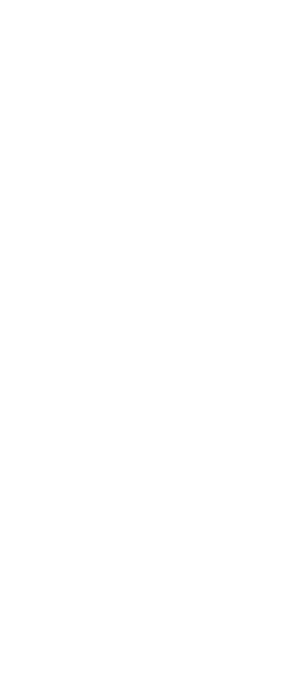

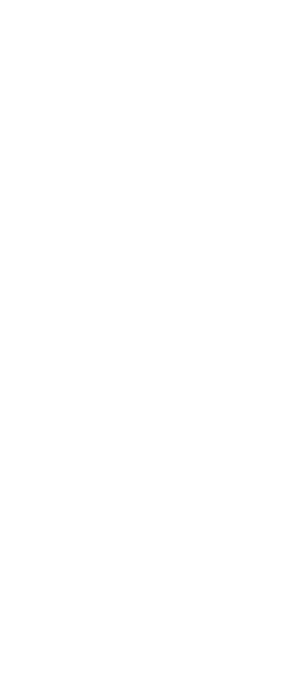

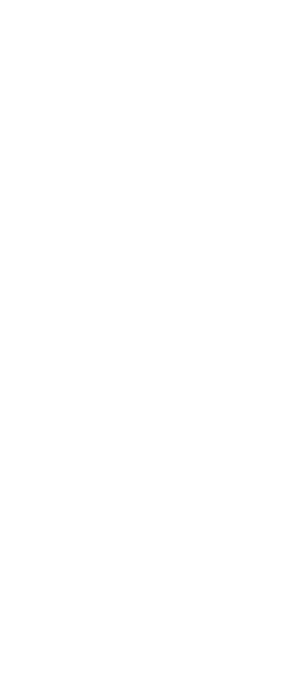

In [8]:
deeplabcut.evaluate_network(
    config_path,
    Shuffles=[1,2,3],
    trainingsetindex=0,
    plotting=True,
    show_errors=True,
    comparisonbodyparts='all',
    gputouse=notebook_gpu,
    rescale=False,
    modelprefix='',
)

## (I) Novel Video Analysis

In [4]:
deeplabcut.analyze_videos?

In [9]:
deeplabcut.analyze_videos(
    config_path,
    os.path.join(project_path,'videos'),
    videotype='.mp4',
    shuffle=1,
    trainingsetindex=0,
    gputouse=notebook_gpu,
    save_as_csv=True,
    in_random_order=False,
    destfolder=None,
    batchsize=None,
    cropping=None,
    TFGPUinference=True,
    dynamic=(False, 0.5, 10),
    modelprefix='',
    robust_nframes=True,
    allow_growth=True,
    use_shelve=False,
    auto_track=True,
    n_tracks=None,
    calibrate=False,
    identity_only=False,
    use_openvino=None,
)

Config:
{'all_joints': [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]],
 'all_joints_names': ['RKNE',
                      'RANK',
                      'RD3M',
                      'RD1M',
                      'RHLX',
                      'LHLX',
                      'LD1M',
                      'LD3M',
                      'LANK',
                      'LKNE'],
 'batch_size': 1,
 'crop_pad': 0,
 'dataset': 'training-datasets\\iteration-0\\UnaugmentedDataSet_AVI-DYS-lower-limbApr19\\AVI-DYS-lower-limb_zach_roth95shuffle1.mat',
 'dataset_type': 'imgaug',
 'deterministic': False,
 'fg_fraction': 0.25,
 'global_scale': 0.8,
 'init_weights': 'C:\\Users\\zacha\\anaconda3\\envs\\dlc-gpu1\\lib\\site-packages\\deeplabcut\\pose_estimation_tensorflow\\models\\pretrained\\resnet_v1_152.ckpt',
 'intermediate_supervision': False,
 'intermediate_supervision_layer': 12,
 'location_refinement': True,
 'locref_huber_loss': True,
 'locref_loss_weight': 1.0,
 'locref_stdev': 7.2801,
 'log_dir'

Using snapshot-1000000 for model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\dlc-models\iteration-0\AVI-DYS-lower-limbApr19-trainset95shuffle1
Analyzing all the videos in the directory...
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\001-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\001-11cropped.mp4
Duration of video [s]:  8.24 , recorded with  25.0 fps!
Overall # of frames:  206  found with (before cropping) frame dimensions:  284 588
Starting to extract posture


100%|██████████| 206/206 [00:02<00:00, 84.74it/s] 


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\001-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\001-12cropped.mp4
Duration of video [s]:  16.08 , recorded with  25.0 fps!
Overall # of frames:  402  found with (before cropping) frame dimensions:  376 720
Starting to extract posture


100%|██████████| 402/402 [00:04<00:00, 81.10it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\003-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\003-11cropped.mp4
Duration of video [s]:  5.4 , recorded with  25.0 fps!
Overall # of frames:  135  found with (before cropping) frame dimensions:  346 618
Starting to extract posture


100%|██████████| 135/135 [00:01<00:00, 68.23it/s] 


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\003-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\003-12cropped.mp4
Duration of video [s]:  12.48 , recorded with  25.0 fps!
Overall # of frames:  312  found with (before cropping) frame dimensions:  322 564
Starting to extract posture


100%|██████████| 312/312 [00:03<00:00, 95.33it/s] 


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\004-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\004-11cropped.mp4
Duration of video [s]:  11.36 , recorded with  25.0 fps!
Overall # of frames:  284  found with (before cropping) frame dimensions:  414 828
Starting to extract posture


100%|██████████| 284/284 [00:04<00:00, 60.78it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\004-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\004-12cropped.mp4
Duration of video [s]:  11.12 , recorded with  25.0 fps!
Overall # of frames:  278  found with (before cropping) frame dimensions:  418 824
Starting to extract posture


100%|██████████| 278/278 [00:04<00:00, 60.53it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\005-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\005-11cropped.mp4
Duration of video [s]:  13.0 , recorded with  25.0 fps!
Overall # of frames:  325  found with (before cropping) frame dimensions:  324 592
Starting to extract posture


100%|██████████| 325/325 [00:03<00:00, 94.53it/s] 


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\005-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\005-12cropped.mp4
Duration of video [s]:  8.12 , recorded with  25.0 fps!
Overall # of frames:  203  found with (before cropping) frame dimensions:  300 578
Starting to extract posture


100%|██████████| 203/203 [00:02<00:00, 85.19it/s] 


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\115-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\115-11cropped.mp4
Duration of video [s]:  19.44 , recorded with  25.0 fps!
Overall # of frames:  486  found with (before cropping) frame dimensions:  218 448
Starting to extract posture


100%|██████████| 486/486 [00:03<00:00, 157.41it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\115-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\115-12cropped.mp4
Duration of video [s]:  15.72 , recorded with  25.0 fps!
Overall # of frames:  393  found with (before cropping) frame dimensions:  234 444
Starting to extract posture


100%|██████████| 393/393 [00:02<00:00, 131.01it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\116-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\116-11cropped.mp4
Duration of video [s]:  19.0 , recorded with  25.0 fps!
Overall # of frames:  475  found with (before cropping) frame dimensions:  342 484
Starting to extract posture


100%|██████████| 475/475 [00:04<00:00, 110.78it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\116-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\116-12cropped.mp4
Duration of video [s]:  26.73 , recorded with  30.0 fps!
Overall # of frames:  802  found with (before cropping) frame dimensions:  448 578
Starting to extract posture


100%|██████████| 802/802 [00:08<00:00, 89.90it/s] 


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\117-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\117-11cropped.mp4
Duration of video [s]:  55.44 , recorded with  25.0 fps!
Overall # of frames:  1386  found with (before cropping) frame dimensions:  1920 1080
Starting to extract posture


100%|██████████| 1386/1386 [01:35<00:00, 14.57it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\117-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\117-12cropped.mp4
Duration of video [s]:  50.28 , recorded with  25.0 fps!
Overall # of frames:  1257  found with (before cropping) frame dimensions:  438 574
Starting to extract posture


100%|██████████| 1257/1257 [00:12<00:00, 97.05it/s] 


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\118-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\118-11cropped.mp4
Duration of video [s]:  10.6 , recorded with  25.0 fps!
Overall # of frames:  265  found with (before cropping) frame dimensions:  256 522
Starting to extract posture


100%|██████████| 265/265 [00:02<00:00, 115.60it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\118-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\118-12cropped.mp4
Duration of video [s]:  14.4 , recorded with  25.0 fps!
Overall # of frames:  360  found with (before cropping) frame dimensions:  1920 1080
Starting to extract posture


100%|██████████| 360/360 [00:25<00:00, 14.34it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\120-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\120-11cropped.mp4
Duration of video [s]:  24.24 , recorded with  25.0 fps!
Overall # of frames:  606  found with (before cropping) frame dimensions:  338 382
Starting to extract posture


100%|██████████| 606/606 [00:04<00:00, 151.49it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\120-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\120-12cropped.mp4
Duration of video [s]:  31.28 , recorded with  25.0 fps!
Overall # of frames:  782  found with (before cropping) frame dimensions:  320 422
Starting to extract posture


100%|██████████| 782/782 [00:05<00:00, 154.02it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\121-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\121-11cropped.mp4
Duration of video [s]:  29.2 , recorded with  25.0 fps!
Overall # of frames:  730  found with (before cropping) frame dimensions:  258 440
Starting to extract posture


100%|██████████| 730/730 [00:04<00:00, 149.56it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\121-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\121-12cropped.mp4
Duration of video [s]:  26.8 , recorded with  25.0 fps!
Overall # of frames:  670  found with (before cropping) frame dimensions:  284 440
Starting to extract posture


100%|██████████| 670/670 [00:04<00:00, 155.04it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\122-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\122-11cropped.mp4
Duration of video [s]:  26.68 , recorded with  25.0 fps!
Overall # of frames:  667  found with (before cropping) frame dimensions:  304 364
Starting to extract posture


100%|██████████| 667/667 [00:04<00:00, 165.14it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\122-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\122-12cropped.mp4
Duration of video [s]:  29.72 , recorded with  25.0 fps!
Overall # of frames:  743  found with (before cropping) frame dimensions:  288 376
Starting to extract posture


100%|██████████| 743/743 [00:04<00:00, 170.93it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\123-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\123-11cropped.mp4
Duration of video [s]:  31.28 , recorded with  25.0 fps!
Overall # of frames:  782  found with (before cropping) frame dimensions:  294 460
Starting to extract posture


100%|██████████| 782/782 [00:05<00:00, 152.37it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\123-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\123-12cropped.mp4
Duration of video [s]:  28.4 , recorded with  25.0 fps!
Overall # of frames:  710  found with (before cropping) frame dimensions:  332 482
Starting to extract posture


100%|██████████| 710/710 [00:05<00:00, 127.40it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\125-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\125-11cropped.mp4
Duration of video [s]:  33.08 , recorded with  25.0 fps!
Overall # of frames:  827  found with (before cropping) frame dimensions:  224 406
Starting to extract posture


100%|██████████| 827/827 [00:04<00:00, 183.31it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\125-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\125-12cropped.mp4
Duration of video [s]:  34.04 , recorded with  25.0 fps!
Overall # of frames:  851  found with (before cropping) frame dimensions:  254 390
Starting to extract posture


100%|██████████| 851/851 [00:04<00:00, 179.96it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\126-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\126-11cropped.mp4
Duration of video [s]:  22.32 , recorded with  25.0 fps!
Overall # of frames:  558  found with (before cropping) frame dimensions:  226 380
Starting to extract posture


100%|██████████| 558/558 [00:03<00:00, 169.93it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\126-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\126-12cropped.mp4
Duration of video [s]:  26.0 , recorded with  25.0 fps!
Overall # of frames:  650  found with (before cropping) frame dimensions:  178 396
Starting to extract posture


100%|██████████| 650/650 [00:03<00:00, 210.82it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\127-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\127-11cropped.mp4
Duration of video [s]:  19.28 , recorded with  25.0 fps!
Overall # of frames:  482  found with (before cropping) frame dimensions:  210 434
Starting to extract posture


100%|██████████| 482/482 [00:02<00:00, 162.43it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\127-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\127-12cropped.mp4
Duration of video [s]:  17.88 , recorded with  25.0 fps!
Overall # of frames:  447  found with (before cropping) frame dimensions:  206 492
Starting to extract posture


100%|██████████| 447/447 [00:02<00:00, 154.51it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\128-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\128-11cropped.mp4
Duration of video [s]:  17.92 , recorded with  25.0 fps!
Overall # of frames:  448  found with (before cropping) frame dimensions:  296 480
Starting to extract posture


100%|██████████| 448/448 [00:03<00:00, 133.86it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\128-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\128-12cropped.mp4
Duration of video [s]:  17.24 , recorded with  25.0 fps!
Overall # of frames:  431  found with (before cropping) frame dimensions:  282 478
Starting to extract posture


100%|██████████| 431/431 [00:03<00:00, 138.33it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\129-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\129-11cropped.mp4
Duration of video [s]:  18.16 , recorded with  25.0 fps!
Overall # of frames:  454  found with (before cropping) frame dimensions:  216 422
Starting to extract posture


100%|██████████| 454/454 [00:02<00:00, 159.07it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\129-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\129-12cropped.mp4
Duration of video [s]:  16.04 , recorded with  25.0 fps!
Overall # of frames:  401  found with (before cropping) frame dimensions:  218 406
Starting to extract posture


100%|██████████| 401/401 [00:02<00:00, 160.36it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\130-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\130-11cropped.mp4
Duration of video [s]:  15.52 , recorded with  25.0 fps!
Overall # of frames:  388  found with (before cropping) frame dimensions:  248 468
Starting to extract posture


100%|██████████| 388/388 [00:02<00:00, 129.46it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\130-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\130-12cropped.mp4
Duration of video [s]:  17.04 , recorded with  25.0 fps!
Overall # of frames:  426  found with (before cropping) frame dimensions:  256 428
Starting to extract posture


100%|██████████| 426/426 [00:02<00:00, 147.06it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\131-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\131-11cropped.mp4
Duration of video [s]:  11.4 , recorded with  25.0 fps!
Overall # of frames:  285  found with (before cropping) frame dimensions:  310 404
Starting to extract posture


100%|██████████| 285/285 [00:02<00:00, 121.84it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\131-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\131-12cropped.mp4
Duration of video [s]:  16.32 , recorded with  25.0 fps!
Overall # of frames:  408  found with (before cropping) frame dimensions:  386 408
Starting to extract posture


100%|██████████| 408/408 [00:03<00:00, 127.75it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\132-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\132-11cropped.mp4
Duration of video [s]:  15.0 , recorded with  25.0 fps!
Overall # of frames:  375  found with (before cropping) frame dimensions:  428 434
Starting to extract posture


100%|██████████| 375/375 [00:03<00:00, 100.33it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\132-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\132-12cropped.mp4
Duration of video [s]:  27.72 , recorded with  25.0 fps!
Overall # of frames:  693  found with (before cropping) frame dimensions:  412 430
Starting to extract posture


100%|██████████| 693/693 [00:06<00:00, 111.95it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\133-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\133-11cropped.mp4
Duration of video [s]:  23.28 , recorded with  25.0 fps!
Overall # of frames:  582  found with (before cropping) frame dimensions:  296 452
Starting to extract posture


100%|██████████| 582/582 [00:03<00:00, 148.98it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\133-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\133-12cropped.mp4
Duration of video [s]:  22.32 , recorded with  25.0 fps!
Overall # of frames:  558  found with (before cropping) frame dimensions:  316 468
Starting to extract posture


100%|██████████| 558/558 [00:04<00:00, 138.01it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\135-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\135-11cropped.mp4
Duration of video [s]:  29.28 , recorded with  25.0 fps!
Overall # of frames:  732  found with (before cropping) frame dimensions:  234 442
Starting to extract posture


100%|██████████| 732/732 [00:04<00:00, 153.22it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\135-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\135-12cropped.mp4
Duration of video [s]:  16.64 , recorded with  25.0 fps!
Overall # of frames:  416  found with (before cropping) frame dimensions:  266 544
Starting to extract posture


100%|██████████| 416/416 [00:03<00:00, 118.73it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\137-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\137-11cropped.mp4
Duration of video [s]:  40.6 , recorded with  25.0 fps!
Overall # of frames:  1015  found with (before cropping) frame dimensions:  302 438
Starting to extract posture


100%|██████████| 1015/1015 [00:06<00:00, 160.29it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\137-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\137-12cropped.mp4
Duration of video [s]:  36.76 , recorded with  25.0 fps!
Overall # of frames:  919  found with (before cropping) frame dimensions:  312 434
Starting to extract posture


100%|██████████| 919/919 [00:05<00:00, 160.09it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\138-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\138-11cropped.mp4
Duration of video [s]:  24.92 , recorded with  25.0 fps!
Overall # of frames:  623  found with (before cropping) frame dimensions:  220 526
Starting to extract posture


100%|██████████| 623/623 [00:04<00:00, 141.06it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\138-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\138-12cropped.mp4
Duration of video [s]:  21.28 , recorded with  25.0 fps!
Overall # of frames:  532  found with (before cropping) frame dimensions:  230 490
Starting to extract posture


100%|██████████| 532/532 [00:03<00:00, 137.13it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\139-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\139-11cropped.mp4
Duration of video [s]:  25.44 , recorded with  25.0 fps!
Overall # of frames:  636  found with (before cropping) frame dimensions:  472 442
Starting to extract posture


100%|██████████| 636/636 [00:06<00:00, 104.47it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\139-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\139-12cropped.mp4
Duration of video [s]:  28.52 , recorded with  25.0 fps!
Overall # of frames:  713  found with (before cropping) frame dimensions:  430 394
Starting to extract posture


100%|██████████| 713/713 [00:06<00:00, 114.80it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\151-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\151-11cropped.mp4
Duration of video [s]:  39.76 , recorded with  25.0 fps!
Overall # of frames:  994  found with (before cropping) frame dimensions:  662 808
Starting to extract posture


100%|██████████| 994/994 [00:19<00:00, 50.26it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\151-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\151-12cropped.mp4
Duration of video [s]:  42.8 , recorded with  25.0 fps!
Overall # of frames:  1070  found with (before cropping) frame dimensions:  642 816
Starting to extract posture


100%|██████████| 1070/1070 [00:20<00:00, 51.39it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\152-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\152-11cropped.mp4
Duration of video [s]:  40.56 , recorded with  25.0 fps!
Overall # of frames:  1014  found with (before cropping) frame dimensions:  690 896
Starting to extract posture


100%|██████████| 1014/1014 [00:22<00:00, 45.61it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\152-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\152-12cropped.mp4
Duration of video [s]:  43.36 , recorded with  25.0 fps!
Overall # of frames:  1084  found with (before cropping) frame dimensions:  742 836
Starting to extract posture


100%|██████████| 1084/1084 [00:23<00:00, 45.55it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\155-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\155-11cropped.mp4
Duration of video [s]:  18.24 , recorded with  25.0 fps!
Overall # of frames:  456  found with (before cropping) frame dimensions:  710 706
Starting to extract posture


100%|██████████| 456/456 [00:09<00:00, 49.52it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\155-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\155-12cropped.mp4
Duration of video [s]:  21.32 , recorded with  25.0 fps!
Overall # of frames:  533  found with (before cropping) frame dimensions:  1360 968
Starting to extract posture


100%|██████████| 533/533 [00:25<00:00, 21.28it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\156-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\156-11cropped.mp4
Duration of video [s]:  28.16 , recorded with  25.0 fps!
Overall # of frames:  704  found with (before cropping) frame dimensions:  768 816
Starting to extract posture


100%|██████████| 704/704 [00:15<00:00, 44.67it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\156-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\156-12cropped.mp4
Duration of video [s]:  11.12 , recorded with  25.0 fps!
Overall # of frames:  278  found with (before cropping) frame dimensions:  1920 1080
Starting to extract posture


100%|██████████| 278/278 [00:19<00:00, 14.05it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\301-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\301-11cropped.mp4
Duration of video [s]:  10.88 , recorded with  25.0 fps!
Overall # of frames:  272  found with (before cropping) frame dimensions:  442 670
Starting to extract posture


100%|██████████| 272/272 [00:03<00:00, 72.64it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\301-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\301-12cropped.mp4
Duration of video [s]:  27.64 , recorded with  25.0 fps!
Overall # of frames:  691  found with (before cropping) frame dimensions:  368 562
Starting to extract posture


100%|██████████| 691/691 [00:06<00:00, 103.92it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\303-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\303-11cropped.mp4
Duration of video [s]:  24.96 , recorded with  25.0 fps!
Overall # of frames:  624  found with (before cropping) frame dimensions:  702 722
Starting to extract posture


100%|██████████| 624/624 [00:12<00:00, 50.59it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\303-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\303-12cropped.mp4
Duration of video [s]:  54.24 , recorded with  25.0 fps!
Overall # of frames:  1356  found with (before cropping) frame dimensions:  898 722
Starting to extract posture


100%|██████████| 1356/1356 [00:31<00:00, 43.21it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\304-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\304-11cropped.mp4
Duration of video [s]:  27.44 , recorded with  25.0 fps!
Overall # of frames:  686  found with (before cropping) frame dimensions:  344 504
Starting to extract posture


100%|██████████| 686/686 [00:06<00:00, 111.86it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\304-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\304-12cropped.mp4
Duration of video [s]:  36.44 , recorded with  25.0 fps!
Overall # of frames:  911  found with (before cropping) frame dimensions:  362 512
Starting to extract posture


100%|██████████| 911/911 [00:08<00:00, 113.41it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\305-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\305-11cropped.mp4
Duration of video [s]:  31.2 , recorded with  25.0 fps!
Overall # of frames:  780  found with (before cropping) frame dimensions:  402 722
Starting to extract posture


100%|██████████| 780/780 [00:09<00:00, 85.46it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\305-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\305-12cropped.mp4
Duration of video [s]:  36.0 , recorded with  25.0 fps!
Overall # of frames:  900  found with (before cropping) frame dimensions:  412 720
Starting to extract posture


100%|██████████| 900/900 [00:10<00:00, 86.62it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\306-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\306-11cropped.mp4
Duration of video [s]:  13.92 , recorded with  25.0 fps!
Overall # of frames:  348  found with (before cropping) frame dimensions:  540 668
Starting to extract posture


100%|██████████| 348/348 [00:05<00:00, 58.58it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\306-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\306-12cropped.mp4
Duration of video [s]:  10.56 , recorded with  25.0 fps!
Overall # of frames:  264  found with (before cropping) frame dimensions:  510 696
Starting to extract posture


100%|██████████| 264/264 [00:04<00:00, 57.08it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\307-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\307-11cropped.mp4
Duration of video [s]:  19.68 , recorded with  25.0 fps!
Overall # of frames:  492  found with (before cropping) frame dimensions:  266 550
Starting to extract posture


100%|██████████| 492/492 [00:03<00:00, 132.21it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\307-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\307-12cropped.mp4
Duration of video [s]:  19.16 , recorded with  25.0 fps!
Overall # of frames:  479  found with (before cropping) frame dimensions:  252 598
Starting to extract posture


100%|██████████| 479/479 [00:03<00:00, 132.03it/s]


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\308-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\308-11cropped.mp4
Duration of video [s]:  17.76 , recorded with  25.0 fps!
Overall # of frames:  444  found with (before cropping) frame dimensions:  392 572
Starting to extract posture


100%|██████████| 444/444 [00:04<00:00, 94.11it/s] 


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\308-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\308-12cropped.mp4
Duration of video [s]:  17.28 , recorded with  25.0 fps!
Overall # of frames:  432  found with (before cropping) frame dimensions:  402 552
Starting to extract posture


100%|██████████| 432/432 [00:04<00:00, 94.81it/s] 


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\309-11cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\309-11cropped.mp4
Duration of video [s]:  21.12 , recorded with  25.0 fps!
Overall # of frames:  528  found with (before cropping) frame dimensions:  358 618
Starting to extract posture


100%|██████████| 528/528 [00:05<00:00, 97.16it/s] 


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
Starting to analyze %  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\309-12cropped.mp4
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\309-12cropped.mp4
Duration of video [s]:  15.04 , recorded with  25.0 fps!
Overall # of frames:  376  found with (before cropping) frame dimensions:  280 654
Starting to extract posture


100%|██████████| 376/376 [00:03<00:00, 98.81it/s] 


Saving results in C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos...
Saving csv poses!
The videos are analyzed. Now your research can truly start! 
 You can create labeled videos with 'create_labeled_video'
If the tracking is not satisfactory for some videos, consider expanding the training set. You can use the function 'extract_outlier_frames' to extract a few representative outlier frames.


'DLC_resnet152_AVI-DYS-lower-limbApr19shuffle1_1000000'

## (J) Filter pose data data

In [ ]:
deeplabcut.filterpredictions?

In [10]:
deeplabcut.filterpredictions(
    config_path,
    os.path.join(project_path,'videos'),
    videotype='.mp4',
    shuffle=1,
    trainingsetindex=0,
    filtertype='median',
    windowlength=5,
    p_bound=0.001,
    ARdegree=3,
    MAdegree=1,
    alpha=0.01,
    save_as_csv=True,
    destfolder=None,
    modelprefix='',
    track_method='',
)

Analyzing all the videos in the directory...
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\131-11cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\138-11cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\001-12cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\116-11cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\138-12cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\127-11cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-

Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\133-12cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\304-12cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\005-11cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\004-11cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\307-12cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\116-12cropped.mp4
Saving filtered csv poses!
Filtering with median model C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zac

## (K) Plot Trajectories

In [ ]:
deeplabcut.plot_trajectories?

In [7]:
deeplabcut.plot_trajectories(
    config_path,
    os.path.join(project_path,'videos'),
    videotype='.mp4',
    shuffle=1,
    trainingsetindex=0,
    filtered=True,
    displayedbodyparts='all',
    displayedindividuals='all',
    showfigures=False,
    destfolder=None,
    modelprefix='',
    imagetype='.svg',
    resolution=300,
    linewidth=1.0,
    track_method='',
)

Analyzing all the videos in the directory...
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\156-12cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\151_02cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\126-12cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\001-02cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\132-02cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\304-11cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\004-02cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\305-02cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower

Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\156-02cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\123-12cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\301-02cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\301-11cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\116-02cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\128-11cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\304-12cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\122-12cropped.mp4 and data.
Loading  C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-07\videos\117-11cropp

## (L) Create Labeled Videos

In [ ]:
deeplabcut.create_labeled_video?

In [11]:
deeplabcut.create_labeled_video(
    config_path,
    os.path.join(project_path,'videos'),
    videotype='.mp4',
    shuffle=1,
    trainingsetindex=0,
    filtered=True,
    fastmode=False,
    save_frames=False,
    keypoints_only=False,
    Frames2plot=None,
    displayedbodyparts='all',
    displayedindividuals='all',
    codec='mp4v',
    outputframerate=None,
    destfolder=None,
    draw_skeleton=True,
    trailpoints=0,
    displaycropped=False,
    color_by='bodypart',
    modelprefix='',
    track_method='',
)

Analyzing all the videos in the directory...


## Analyze Skeleton

In [5]:
deeplabcut.analyzeskeleton?

Signature:
deeplabcut.analyzeskeleton(
    config,
    videos,
    videotype='',
    shuffle=1,
    trainingsetindex=0,
    filtered=False,
    save_as_csv=False,
    destfolder=None,
    modelprefix='',
    track_method='',
)
Docstring:
Extracts length and orientation of each "bone" of the skeleton.

The bone and skeleton information is defined in the config file.

Parameters
----------
config: str
    Full path of the config.yaml file.

videos: list[str]
    The full paths to videos for analysis or a path to the directory, where all the
    videos with same extension are stored.

videotype: str, optional, default=""
    Checks for the extension of the video in case the input to the video is a
    directory. Only videos with this extension are analyzed.
    If left unspecified, videos with common extensions
    ('avi', 'mp4', 'mov', 'mpeg', 'mkv') are kept.

shuffle : int, optional, default=1
    The shuffle index of training dataset. The extracted frames will be stored in
    the lab

In [6]:
deeplabcut.analyzeskeleton(
    config_path,
    os.path.join(project_path,'videos'),
    videotype='.mp4',
    shuffle=1,
    trainingsetindex=0,
    filtered=True,
    save_as_csv=True,
    destfolder=None,
    modelprefix='',
    track_method='',
)

Analyzing all the videos in the directory...
Processing C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\129-12cropped.mp4
Processing C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\303-11cropped.mp4
Processing C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\127-12cropped.mp4
Processing C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\138-12cropped.mp4
Processing C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\116-11cropped.mp4
Processing C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\152-11cropped.mp4
Processing C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\122-11cropped.mp4
Processing C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\156-12cropped.mp4
Processing C:\Users\zacha\Repos\AVI-DYS\AVI-DYS-lower-limb-zach_roth-2023-04-19\videos\309-11cropped.mp4
Processing